## 회귀 (regression) 예측 (보스턴 집값 예측)

수치형 값을 예측 (Y의 값이 연속된 수치로 표현)

**예시**
- 주택 가격 예측
- 매출액 예측

[도큐먼트](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

In [5]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

In [6]:
# scikit-learn안에 내장된 데이터셋 사용
from sklearn.datasets import load_boston

In [7]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh                         2.3.3
branca

데이터 로드

In [8]:
data = load_boston()

In [9]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

data['data']에는 X 데이터, data['feature_names']에는 컬럼 명입니다.

In [10]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

Y 데이터인 price도 데이터프레임에 추가 합니다.

In [11]:
df['MEDV'] = data['target']

In [12]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**컬럼 소개**

속성 수 : 13

* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)

train / test 데이터를 분할 합니다.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])

<ipython-input-14-5fdc4024a942>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])


In [15]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [16]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
481,5.70818,0.0,18.10,0.0,0.532,6.750,74.9,3.3317,24.0,666.0,20.2,393.07,7.74
289,0.04297,52.5,5.32,0.0,0.405,6.565,22.9,7.3172,6.0,293.0,16.6,371.72,9.51
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
245,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46
27,0.95577,0.0,8.14,0.0,0.538,6.047,88.8,4.4534,4.0,307.0,21.0,306.38,17.28


In [17]:
y_train.head()

481    23.7
289    24.8
503    23.9
245    18.5
27     14.8
Name: MEDV, dtype: float64

## 평가 지표 만들기

### MSE(Mean Squared Error)

${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 값

### MAE (Mean Absolute Error)

$(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

예측값과 실제값의 차이에 대한 **절대값**에 대하여 평균을 낸 값

### RMSE (Root Mean Squared Error)

$\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$


예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 뒤 **루트**를 씌운 값

### 평가 지표 만들어 보기

In [18]:
import numpy as np

In [19]:
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

In [20]:
def my_mse(pred, actual):
    return ((pred - actual)**2).mean()

In [21]:
my_mse(pred, actual)

4.0

In [22]:
def my_mae(pred, actual):
    return np.abs(pred - actual).mean()

In [23]:
my_mae(pred, actual)

2.0

In [24]:
def my_rmse(pred, actual):
    return np.sqrt(my_mse(pred, actual))

In [25]:
my_rmse(pred, actual)

2.0

### sklearn의 평가지표 활용하기

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
my_mae(pred, actual), mean_absolute_error(pred, actual)

(2.0, 2.0)

In [28]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(4.0, 4.0)

### 모델별 성능 확인을 위한 함수

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

## LinearRegression

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
# n_jobs=-1이면 사용할 수 있는 CPU 다 활용
model = LinearRegression(n_jobs=-1)

* n_jobs: CPU코어의 사용

In [32]:
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [33]:
pred = model.predict(x_test)

### Multi-variable Linear Regression and Matrix dimension
 **Hypothesis(가설)**   
 h(theta) = regression line to predict future values
 <br> theta = parameters </br>
 <br> </br>
<br> $$\mathbf{ h_\theta(x_{i}) = \theta_0+\theta_1 CRIM + \theta_2 ZN + \theta_3 INDUS + \theta_4 CHAS + \theta_5 NOX + \theta_6 RM + ... }$$ </br>

In [34]:
# theta_0 => intercept_
# theta_1, theta_2 ... theta_n => coef_

print(model.coef_)
print(model.intercept_)

[ -0.11708798   0.03959965   0.02666259   1.21886322 -18.15089755
   3.92591702   0.00088937  -1.33650225   0.28222193  -0.01123156
  -1.0547289    0.00946687  -0.4533147 ]
36.28103232008205


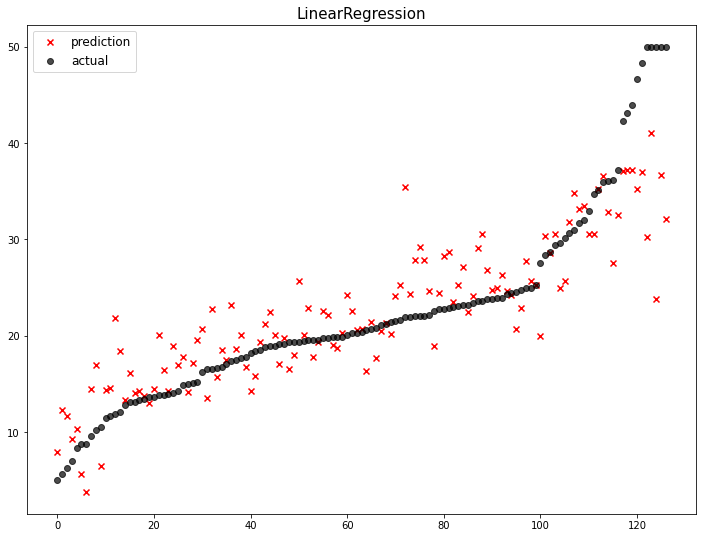

              model        mse
0  LinearRegression  28.497553


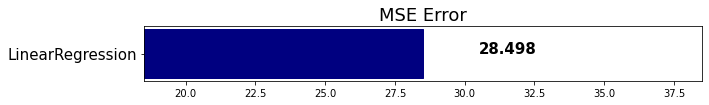

In [35]:
mse_eval('LinearRegression', pred, y_test)

## 규제 (Regularization)

학습이 과대적합 되는 것을 방지하고자 일종의 **penalty**를 부여하는 것

**L2 규제 (L2 Regularization)**

* 각 가중치 제곱의 합에 규제 강도(Regularization Strength) λ를 곱한다. 
* λ를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), λ를 작게 하면 가중치가 증가한다(규제를 중요시하지 않음).

**L1 규제 (L1 Regularization)**

* 가중치의 제곱의 합이 아닌 **가중치의 합**을 더한 값에 규제 강도(Regularization Strength) λ를 곱하여 오차에 더한다. 
* 어떤 가중치(w)는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것이다. 


**L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로는 L2규제가 더 많이 사용된다**

**릿지(Ridge) - L2 규제**

$Error=MSE+αw^2$ 

**라쏘(Lasso) - L1 규제**  

$Error=MSE+α|w|$

In [36]:
from sklearn.linear_model import Ridge

In [37]:
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

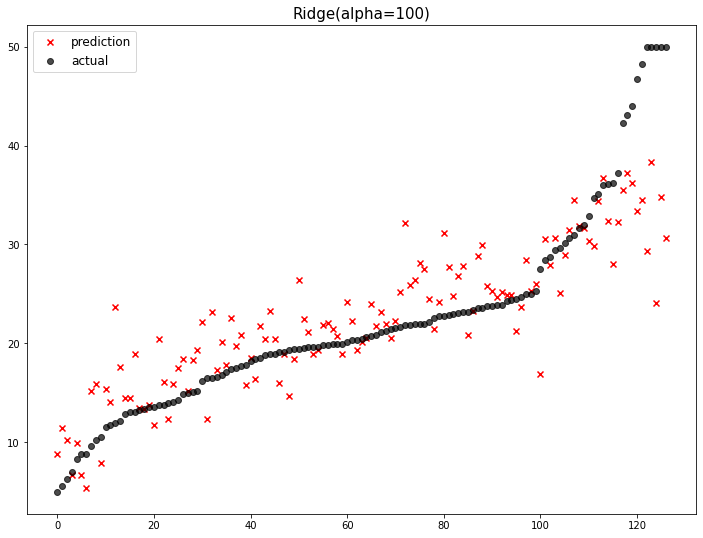

              model        mse
0  Ridge(alpha=100)  30.987853
1  LinearRegression  28.497553


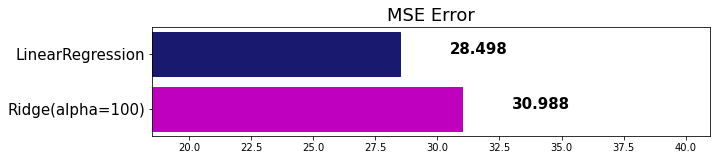

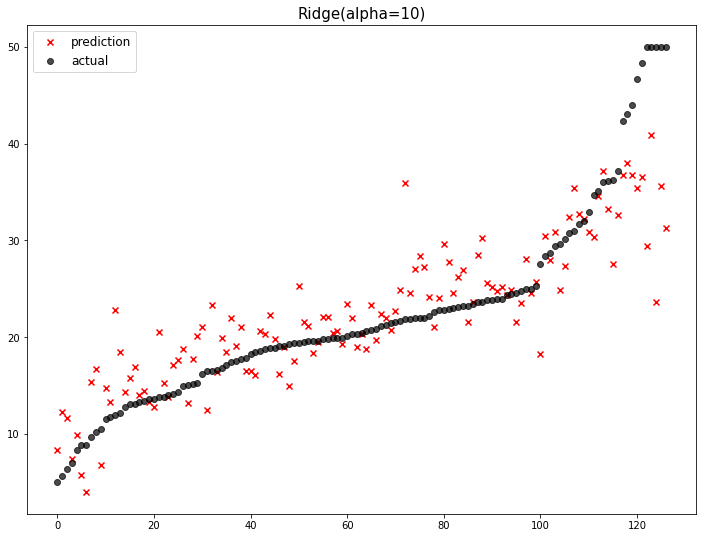

              model        mse
0  Ridge(alpha=100)  30.987853
1   Ridge(alpha=10)  29.279366
2  LinearRegression  28.497553


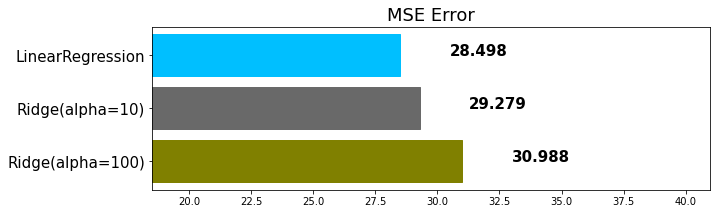

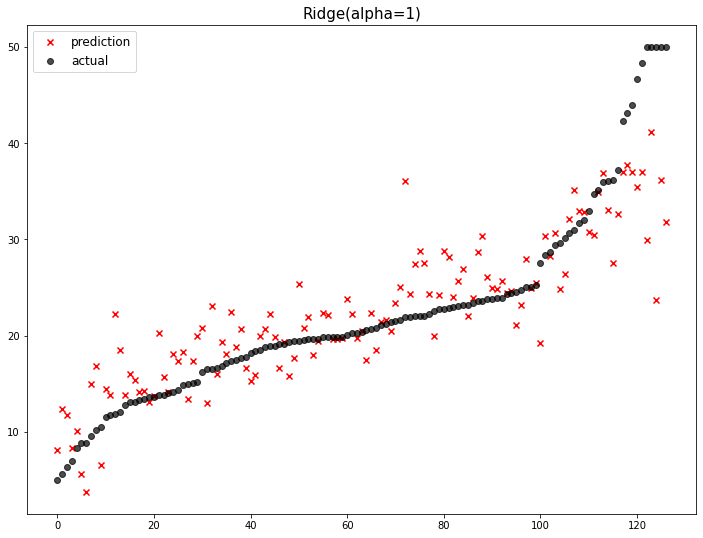

              model        mse
0  Ridge(alpha=100)  30.987853
1   Ridge(alpha=10)  29.279366
2    Ridge(alpha=1)  28.593862
3  LinearRegression  28.497553


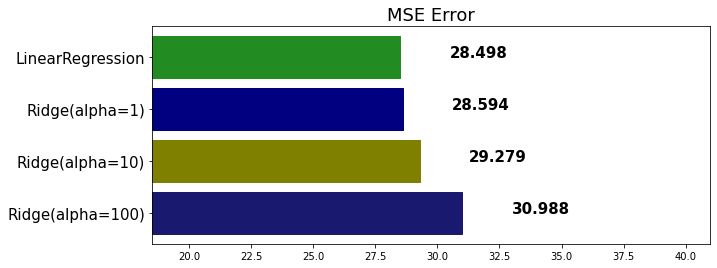

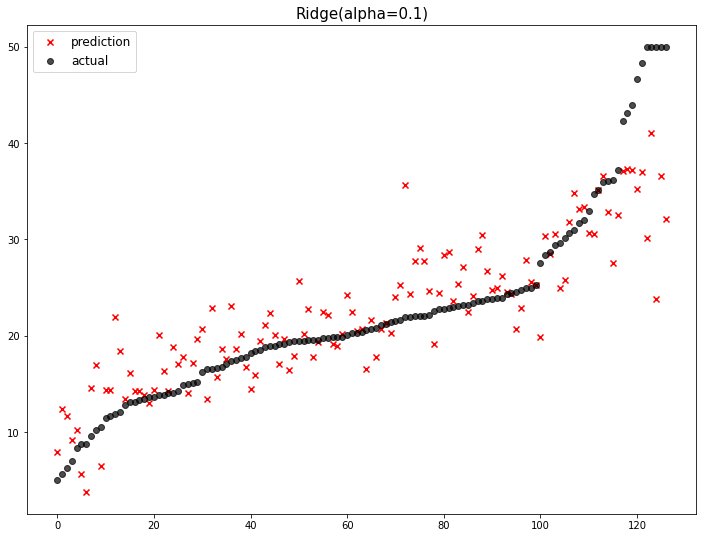

              model        mse
0  Ridge(alpha=100)  30.987853
1   Ridge(alpha=10)  29.279366
2    Ridge(alpha=1)  28.593862
3  LinearRegression  28.497553
4  Ridge(alpha=0.1)  28.479293


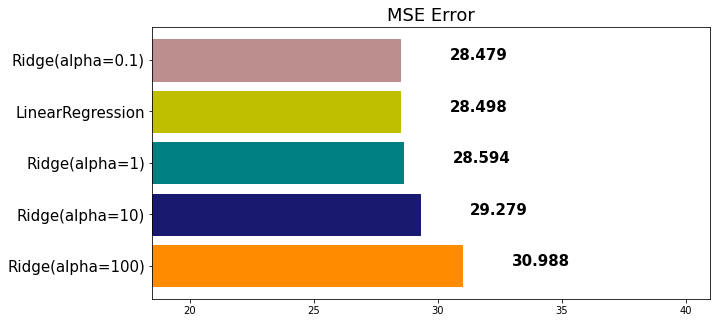

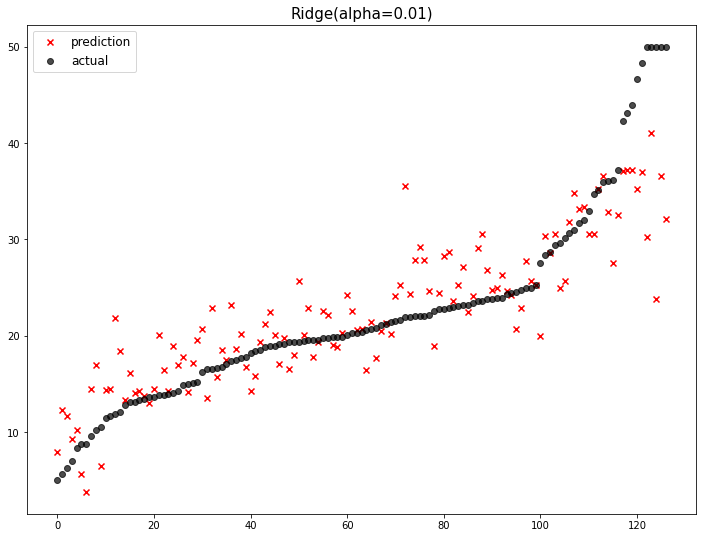

               model        mse
0   Ridge(alpha=100)  30.987853
1    Ridge(alpha=10)  29.279366
2     Ridge(alpha=1)  28.593862
3   LinearRegression  28.497553
4  Ridge(alpha=0.01)  28.494908
5   Ridge(alpha=0.1)  28.479293


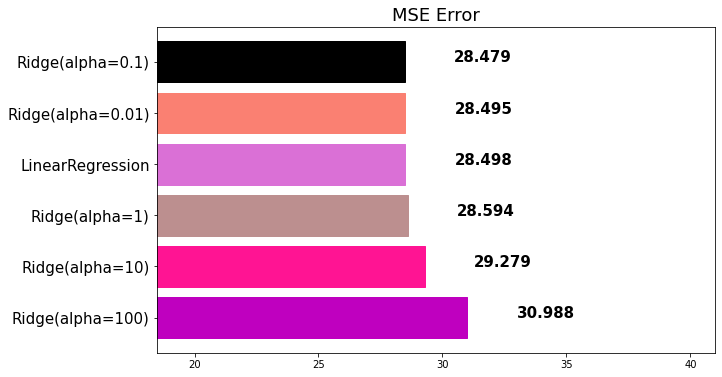

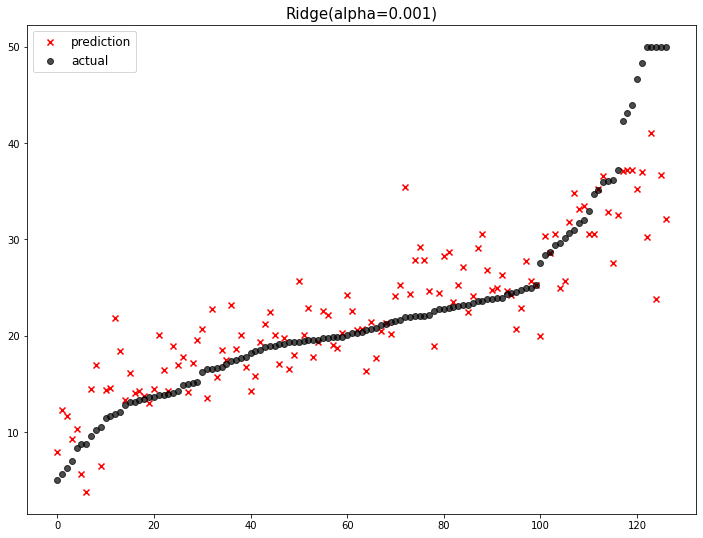

                model        mse
0    Ridge(alpha=100)  30.987853
1     Ridge(alpha=10)  29.279366
2      Ridge(alpha=1)  28.593862
3    LinearRegression  28.497553
4  Ridge(alpha=0.001)  28.497279
5   Ridge(alpha=0.01)  28.494908
6    Ridge(alpha=0.1)  28.479293


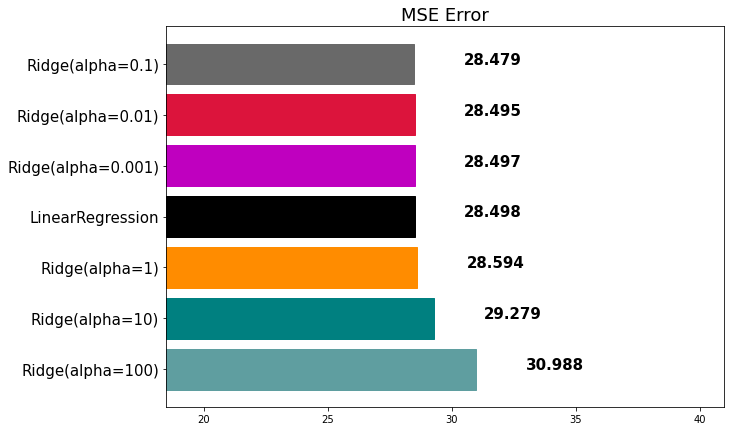

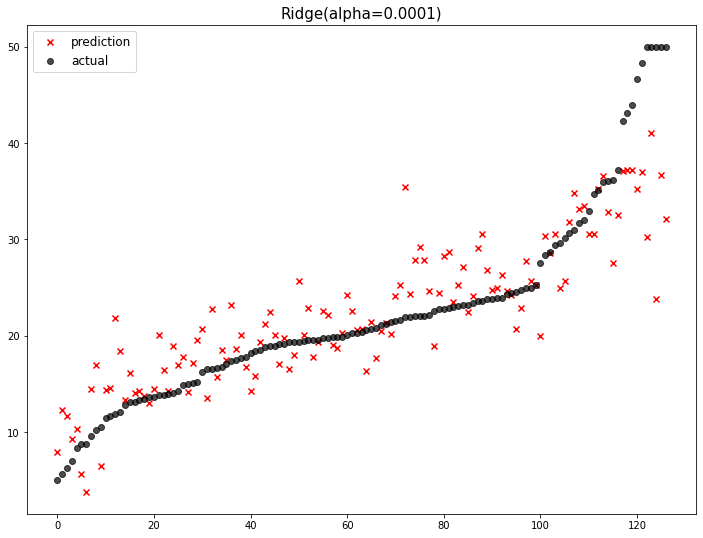

                 model        mse
0     Ridge(alpha=100)  30.987853
1      Ridge(alpha=10)  29.279366
2       Ridge(alpha=1)  28.593862
3     LinearRegression  28.497553
4  Ridge(alpha=0.0001)  28.497526
5   Ridge(alpha=0.001)  28.497279
6    Ridge(alpha=0.01)  28.494908
7     Ridge(alpha=0.1)  28.479293


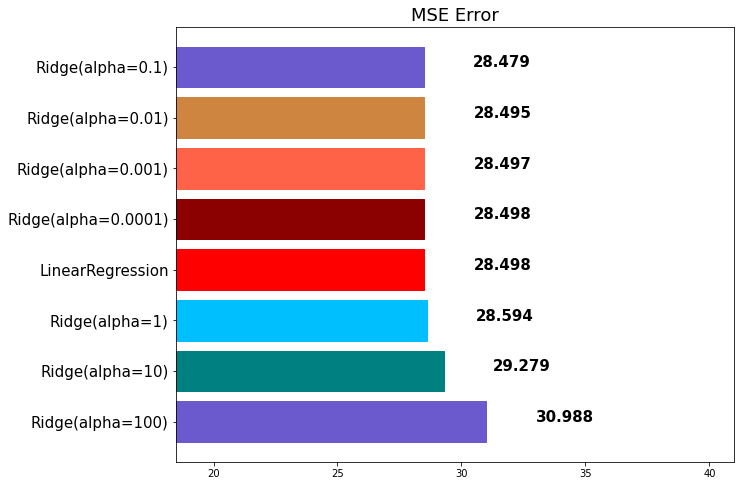

In [38]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test)

In [39]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [40]:
ridge.coef_

array([ -0.11708754,   0.03960003,   0.02665499,   1.21884625,
       -18.1493212 ,   3.92592729,   0.00088795,  -1.33648051,
         0.28221949,  -0.01123173,  -1.0547077 ,   0.00946697,
        -0.45331674])

In [41]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

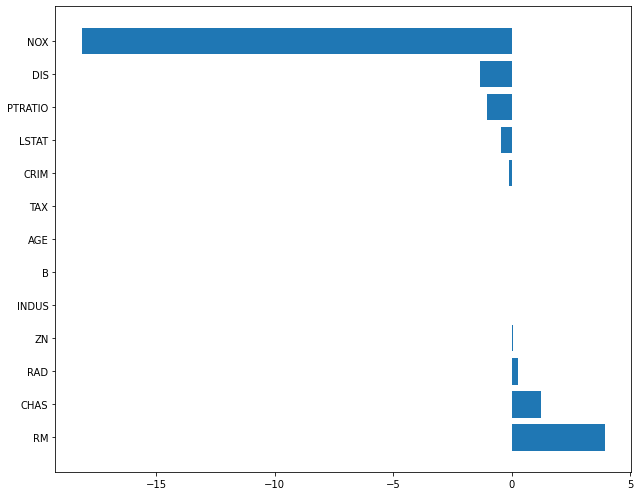

In [42]:
plot_coef(x_train.columns, ridge.coef_)

alpha 값에 따른 coef 의 차이를 확인해 봅시다

In [43]:
ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha=0.001)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_test)

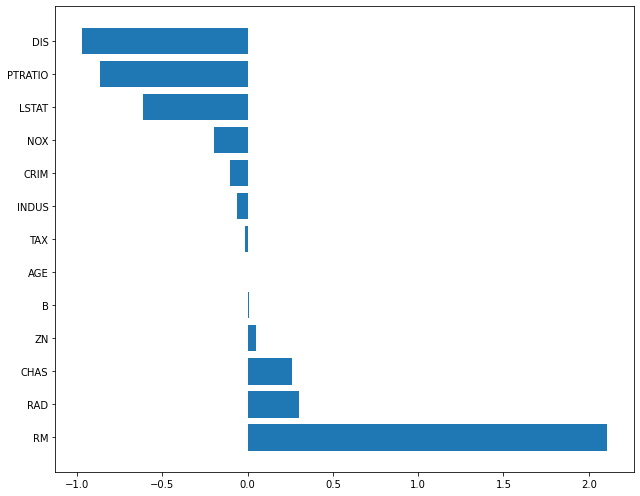

In [44]:
plot_coef(x_train.columns, ridge_100.coef_)

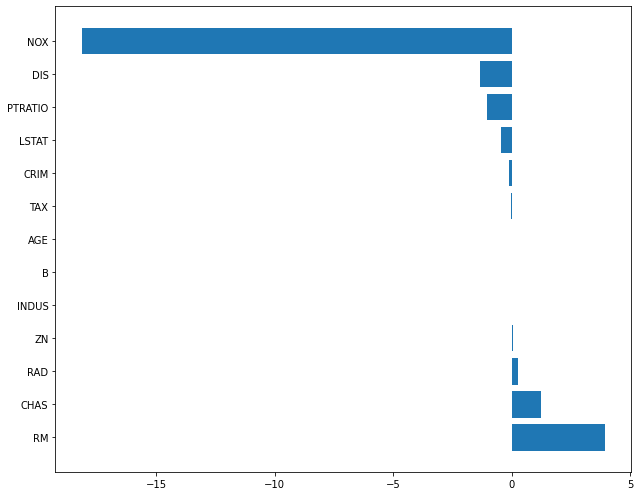

In [45]:
plot_coef(x_train.columns, ridge_001.coef_)

In [46]:
from sklearn.linear_model import Lasso

In [47]:
# 값이 커질 수록 큰 규제입니다.
# alpha값이 커질수록 직선에 가까워진다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

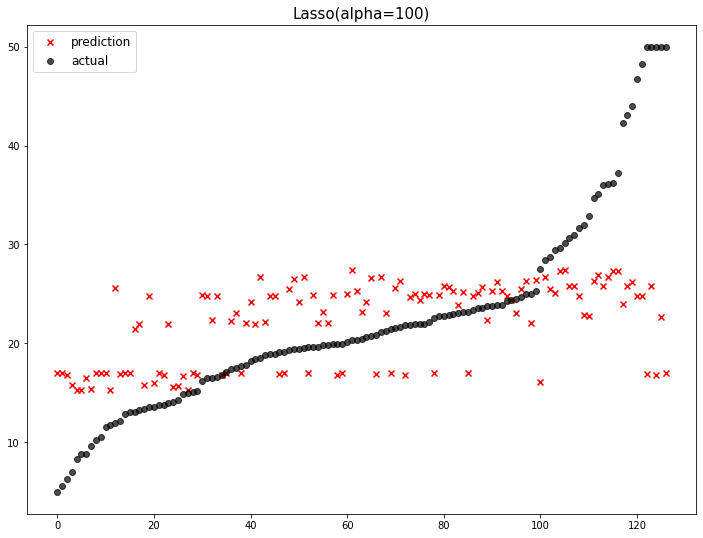

                 model        mse
0     Lasso(alpha=100)  80.482578
1     Ridge(alpha=100)  30.987853
2      Ridge(alpha=10)  29.279366
3       Ridge(alpha=1)  28.593862
4     LinearRegression  28.497553
5  Ridge(alpha=0.0001)  28.497526
6   Ridge(alpha=0.001)  28.497279
7    Ridge(alpha=0.01)  28.494908
8     Ridge(alpha=0.1)  28.479293


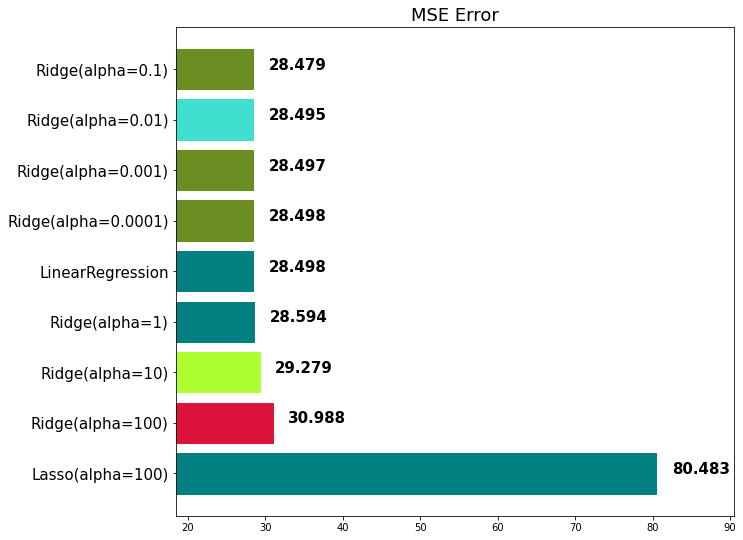

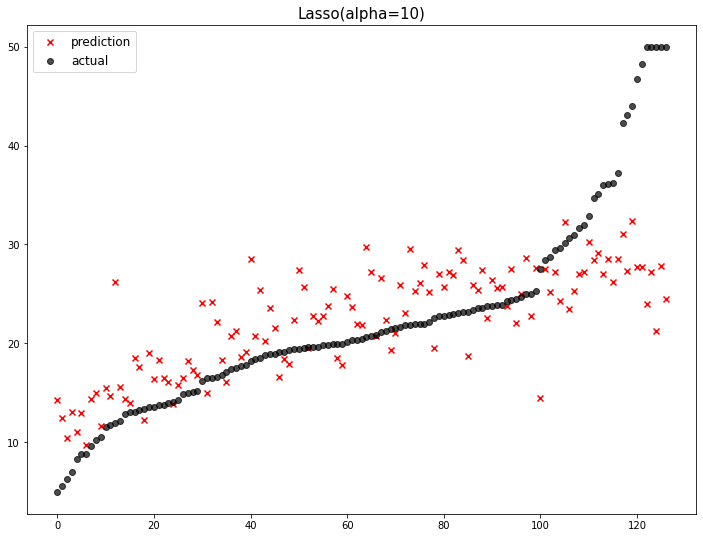

                 model        mse
0     Lasso(alpha=100)  80.482578
1      Lasso(alpha=10)  55.132546
2     Ridge(alpha=100)  30.987853
3      Ridge(alpha=10)  29.279366
4       Ridge(alpha=1)  28.593862
5     LinearRegression  28.497553
6  Ridge(alpha=0.0001)  28.497526
7   Ridge(alpha=0.001)  28.497279
8    Ridge(alpha=0.01)  28.494908
9     Ridge(alpha=0.1)  28.479293


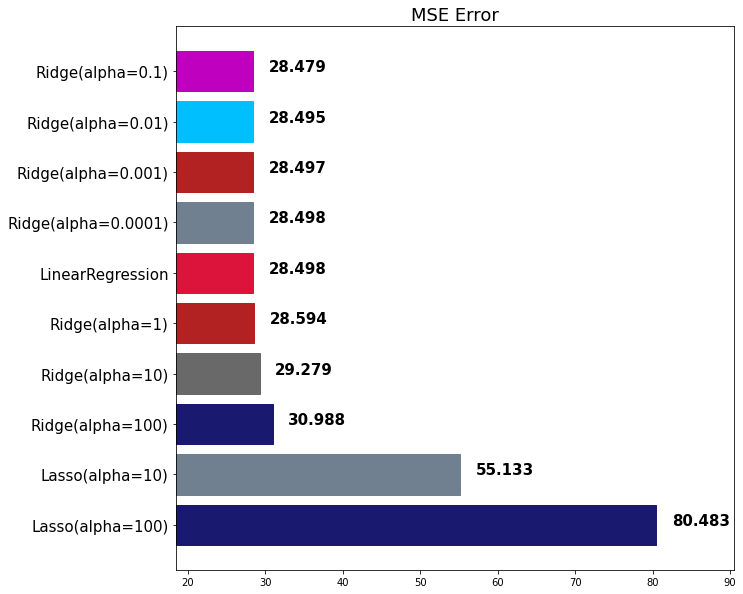

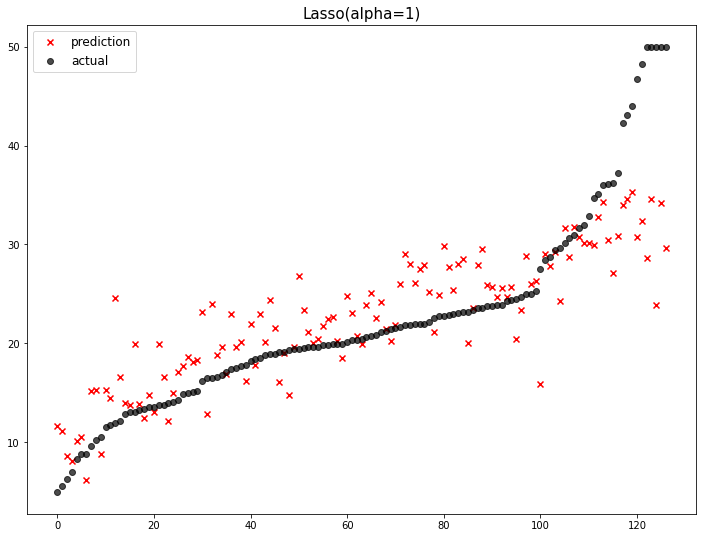

                  model        mse
0      Lasso(alpha=100)  80.482578
1       Lasso(alpha=10)  55.132546
2        Lasso(alpha=1)  35.768550
3      Ridge(alpha=100)  30.987853
4       Ridge(alpha=10)  29.279366
5        Ridge(alpha=1)  28.593862
6      LinearRegression  28.497553
7   Ridge(alpha=0.0001)  28.497526
8    Ridge(alpha=0.001)  28.497279
9     Ridge(alpha=0.01)  28.494908
10     Ridge(alpha=0.1)  28.479293


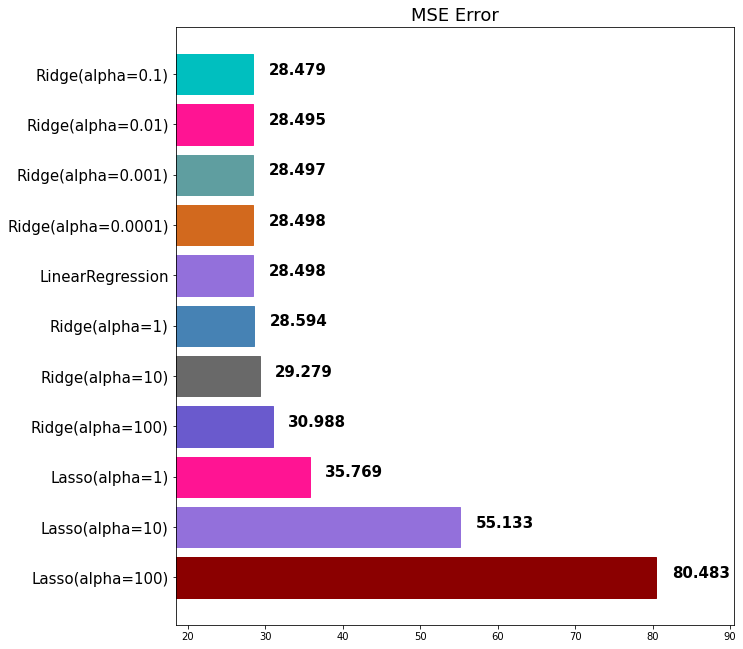

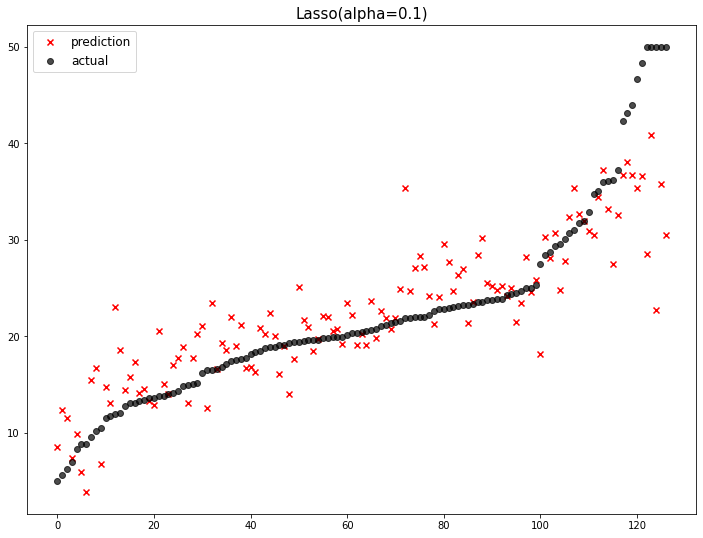

                  model        mse
0      Lasso(alpha=100)  80.482578
1       Lasso(alpha=10)  55.132546
2        Lasso(alpha=1)  35.768550
3      Ridge(alpha=100)  30.987853
4      Lasso(alpha=0.1)  30.206112
5       Ridge(alpha=10)  29.279366
6        Ridge(alpha=1)  28.593862
7      LinearRegression  28.497553
8   Ridge(alpha=0.0001)  28.497526
9    Ridge(alpha=0.001)  28.497279
10    Ridge(alpha=0.01)  28.494908
11     Ridge(alpha=0.1)  28.479293


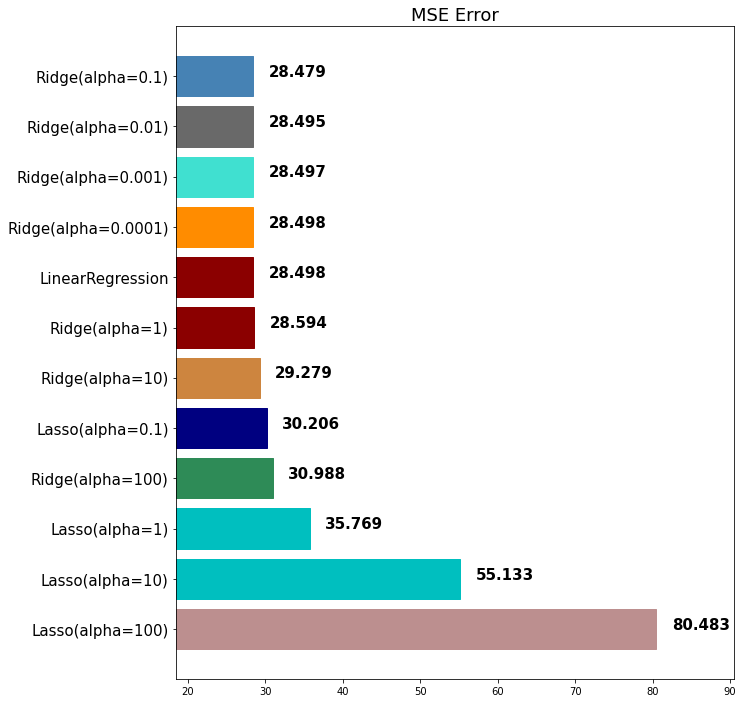

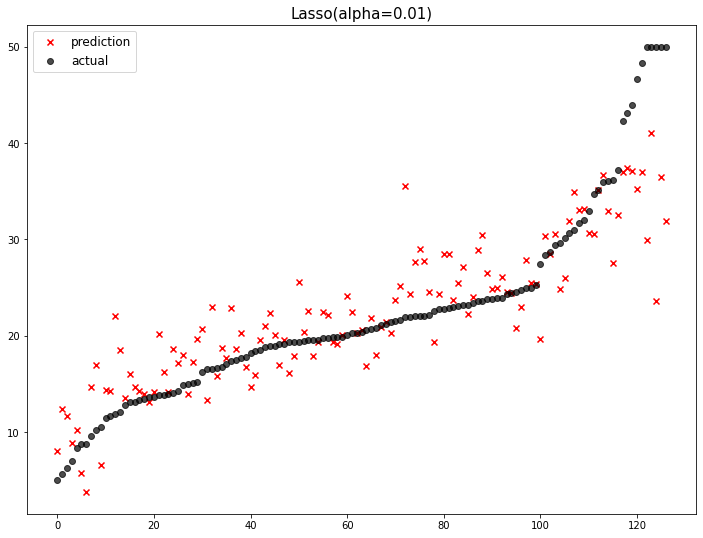

                  model        mse
0      Lasso(alpha=100)  80.482578
1       Lasso(alpha=10)  55.132546
2        Lasso(alpha=1)  35.768550
3      Ridge(alpha=100)  30.987853
4      Lasso(alpha=0.1)  30.206112
5       Ridge(alpha=10)  29.279366
6        Ridge(alpha=1)  28.593862
7     Lasso(alpha=0.01)  28.591530
8      LinearRegression  28.497553
9   Ridge(alpha=0.0001)  28.497526
10   Ridge(alpha=0.001)  28.497279
11    Ridge(alpha=0.01)  28.494908
12     Ridge(alpha=0.1)  28.479293


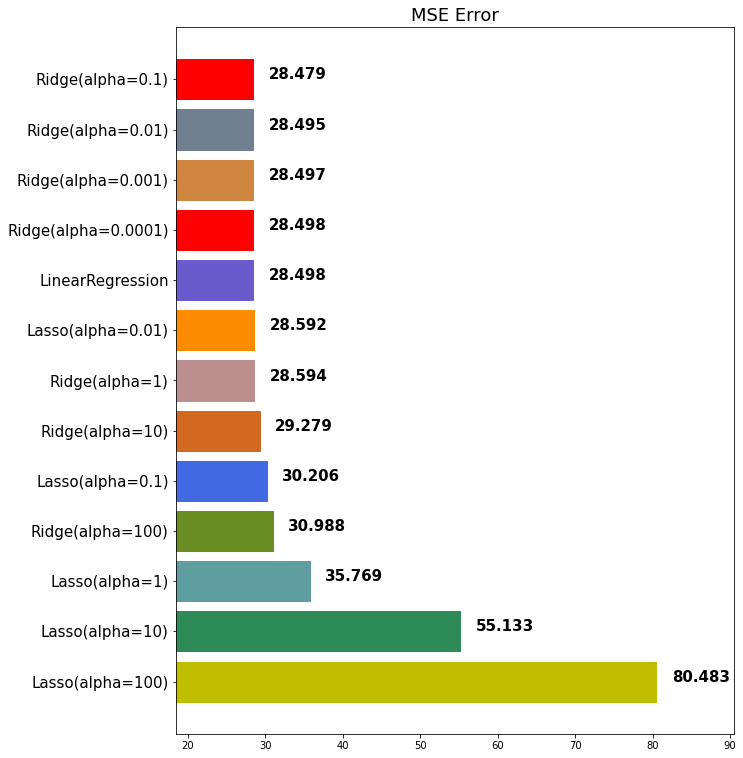

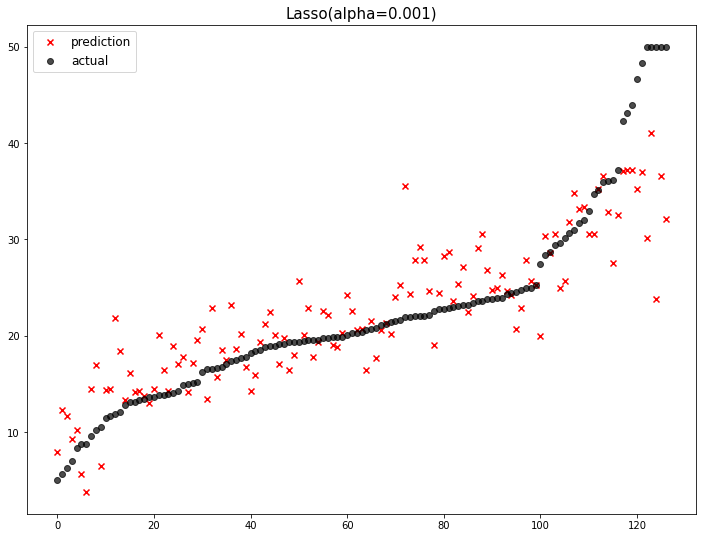

                  model        mse
0      Lasso(alpha=100)  80.482578
1       Lasso(alpha=10)  55.132546
2        Lasso(alpha=1)  35.768550
3      Ridge(alpha=100)  30.987853
4      Lasso(alpha=0.1)  30.206112
5       Ridge(alpha=10)  29.279366
6        Ridge(alpha=1)  28.593862
7     Lasso(alpha=0.01)  28.591530
8    Lasso(alpha=0.001)  28.503423
9      LinearRegression  28.497553
10  Ridge(alpha=0.0001)  28.497526
11   Ridge(alpha=0.001)  28.497279
12    Ridge(alpha=0.01)  28.494908
13     Ridge(alpha=0.1)  28.479293


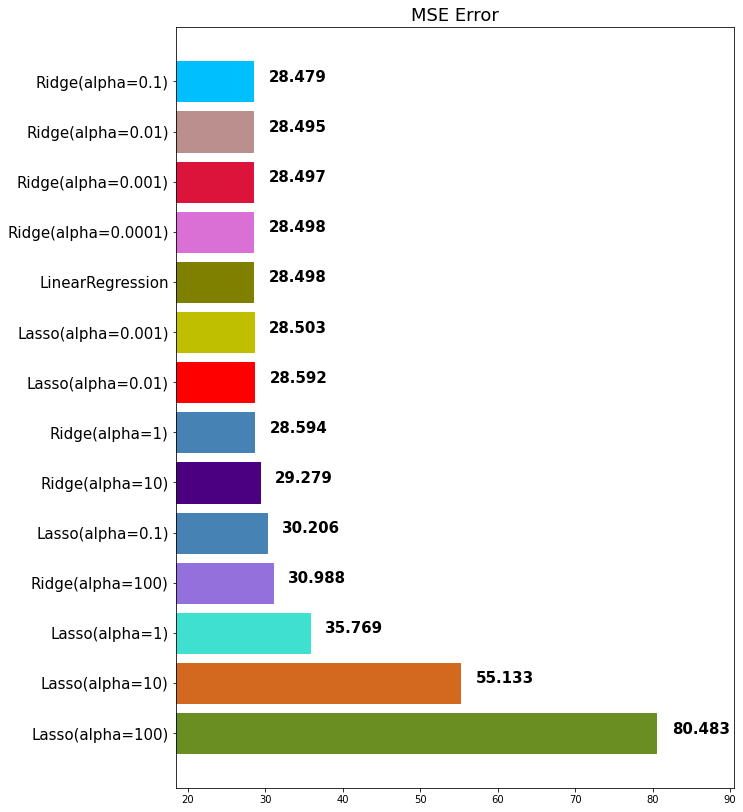

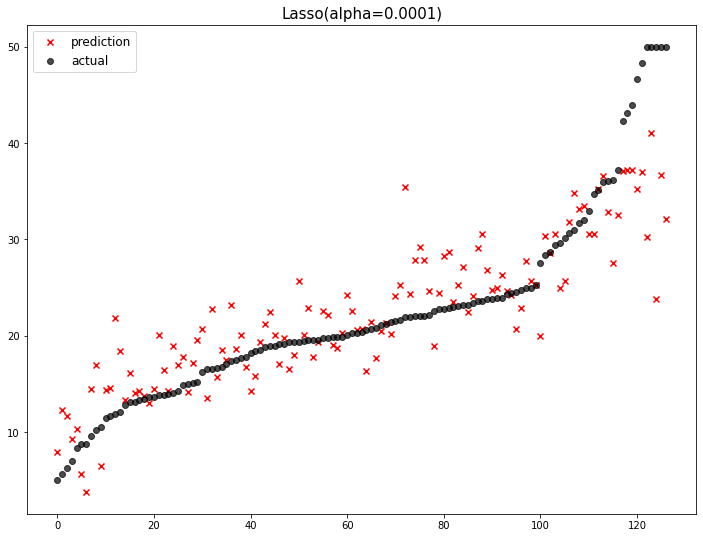

                  model        mse
0      Lasso(alpha=100)  80.482578
1       Lasso(alpha=10)  55.132546
2        Lasso(alpha=1)  35.768550
3      Ridge(alpha=100)  30.987853
4      Lasso(alpha=0.1)  30.206112
5       Ridge(alpha=10)  29.279366
6        Ridge(alpha=1)  28.593862
7     Lasso(alpha=0.01)  28.591530
8    Lasso(alpha=0.001)  28.503423
9   Lasso(alpha=0.0001)  28.498105
10     LinearRegression  28.497553
11  Ridge(alpha=0.0001)  28.497526
12   Ridge(alpha=0.001)  28.497279
13    Ridge(alpha=0.01)  28.494908
14     Ridge(alpha=0.1)  28.479293


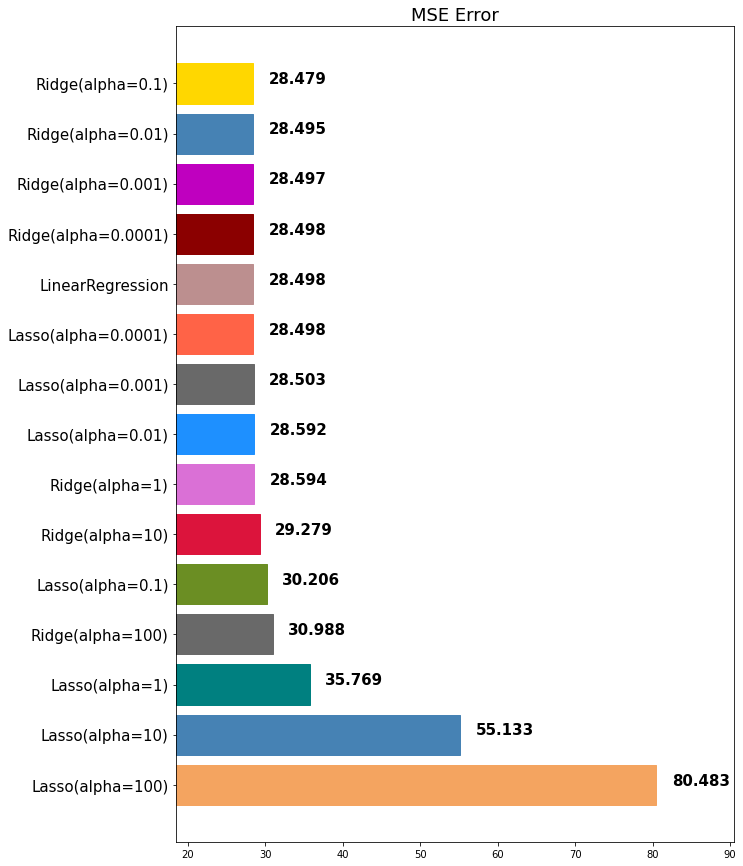

In [48]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

In [49]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

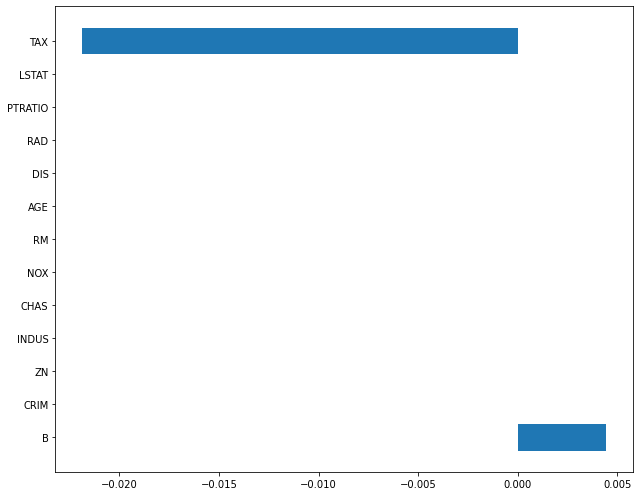

In [50]:
plot_coef(x_train.columns, lasso_100.coef_)

In [51]:
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.02188552,
       -0.        ,  0.0044404 , -0.        ])

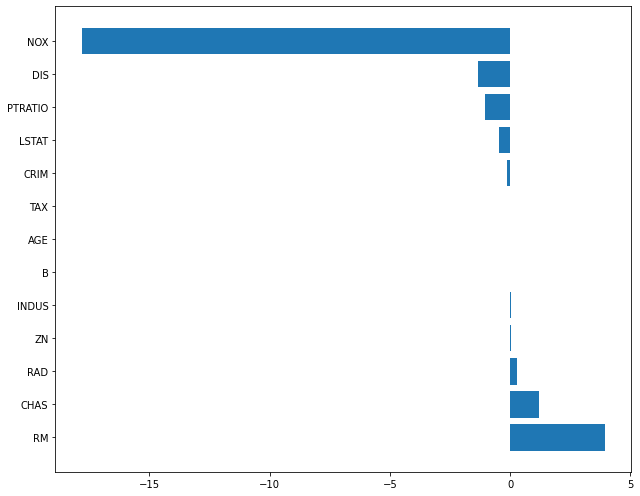

In [52]:
plot_coef(x_train.columns, lasso_001.coef_)

In [53]:
lasso_001.coef_

array([ -0.11695467,   0.03967626,   0.02506872,   1.20134928,
       -17.81116807,   3.92602442,   0.000623  ,  -1.33139288,
         0.28172747,  -0.01127306,  -1.05038724,   0.00948508,
        -0.45391551])

### ElasticNet

* 엘라스틱넷은 릿지 회귀와 라쏘 회귀를 절충한 모델이다. 
* 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용 한다.
* 혼합 정도는 혼합 비율r을 사용해 조절한다.
* r=0이면 엘라스틱넷은 릿지 회귀와 같고, r=1이면 라쏘 회귀와 같다.

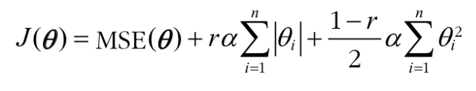

**l1_ratio (default=0.5)**

 * l1_ratio = 0 (L2 규제만 사용). 
 * l1_ratio = 1 (L1 규제만 사용). 
 * 0 < l1_ratio < 1 (L1 and L2 규제의 혼합사용)

In [54]:
from sklearn.linear_model import ElasticNet

In [55]:
# ratios가 수식의 r이다.
ratios = [0.2, 0.5, 0.8]

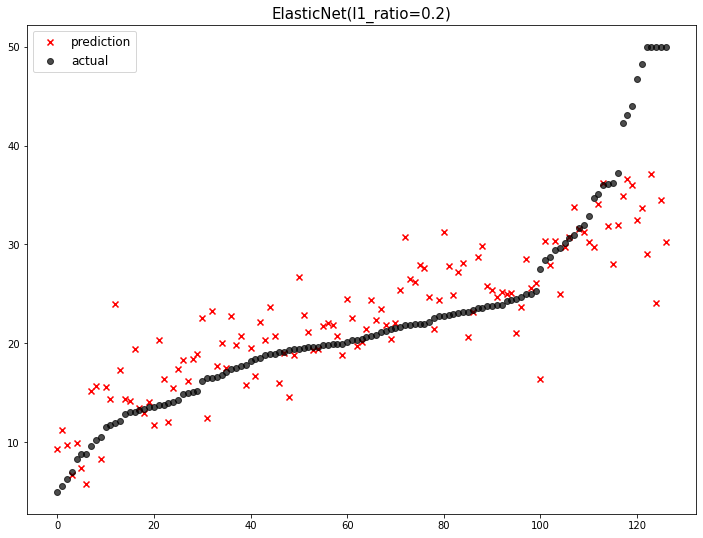

                       model        mse
0           Lasso(alpha=100)  80.482578
1            Lasso(alpha=10)  55.132546
2             Lasso(alpha=1)  35.768550
3   ElasticNet(l1_ratio=0.2)  32.282031
4           Ridge(alpha=100)  30.987853
5           Lasso(alpha=0.1)  30.206112
6            Ridge(alpha=10)  29.279366
7             Ridge(alpha=1)  28.593862
8          Lasso(alpha=0.01)  28.591530
9         Lasso(alpha=0.001)  28.503423
10       Lasso(alpha=0.0001)  28.498105
11          LinearRegression  28.497553
12       Ridge(alpha=0.0001)  28.497526
13        Ridge(alpha=0.001)  28.497279
14         Ridge(alpha=0.01)  28.494908
15          Ridge(alpha=0.1)  28.479293


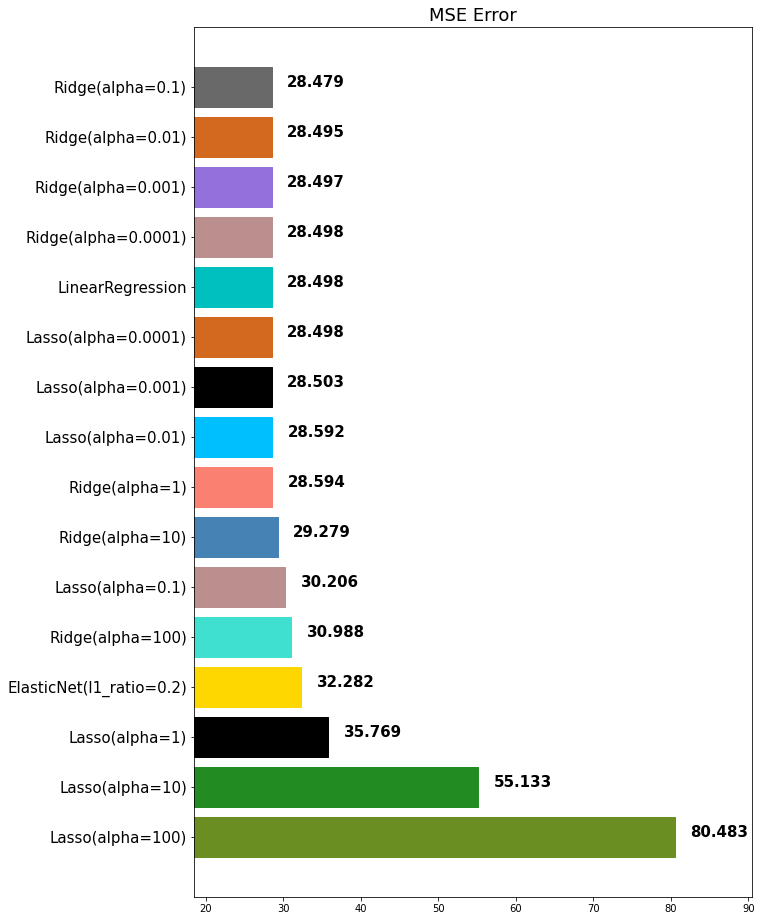

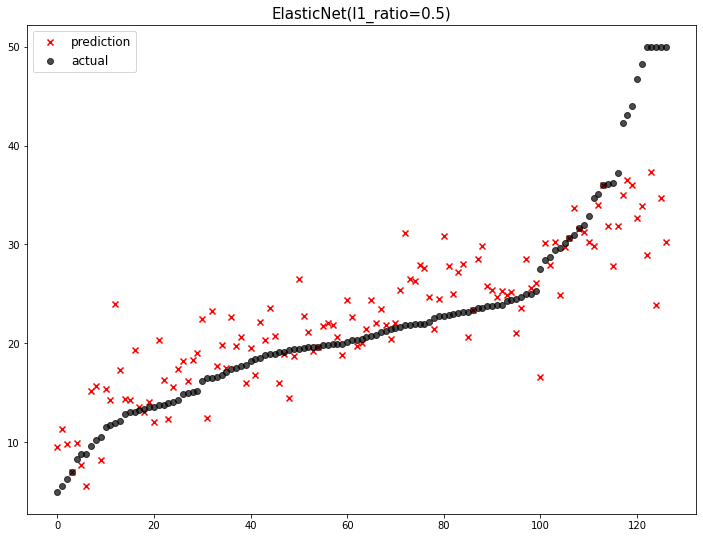

                       model        mse
0           Lasso(alpha=100)  80.482578
1            Lasso(alpha=10)  55.132546
2             Lasso(alpha=1)  35.768550
3   ElasticNet(l1_ratio=0.2)  32.282031
4   ElasticNet(l1_ratio=0.5)  32.180514
5           Ridge(alpha=100)  30.987853
6           Lasso(alpha=0.1)  30.206112
7            Ridge(alpha=10)  29.279366
8             Ridge(alpha=1)  28.593862
9          Lasso(alpha=0.01)  28.591530
10        Lasso(alpha=0.001)  28.503423
11       Lasso(alpha=0.0001)  28.498105
12          LinearRegression  28.497553
13       Ridge(alpha=0.0001)  28.497526
14        Ridge(alpha=0.001)  28.497279
15         Ridge(alpha=0.01)  28.494908
16          Ridge(alpha=0.1)  28.479293


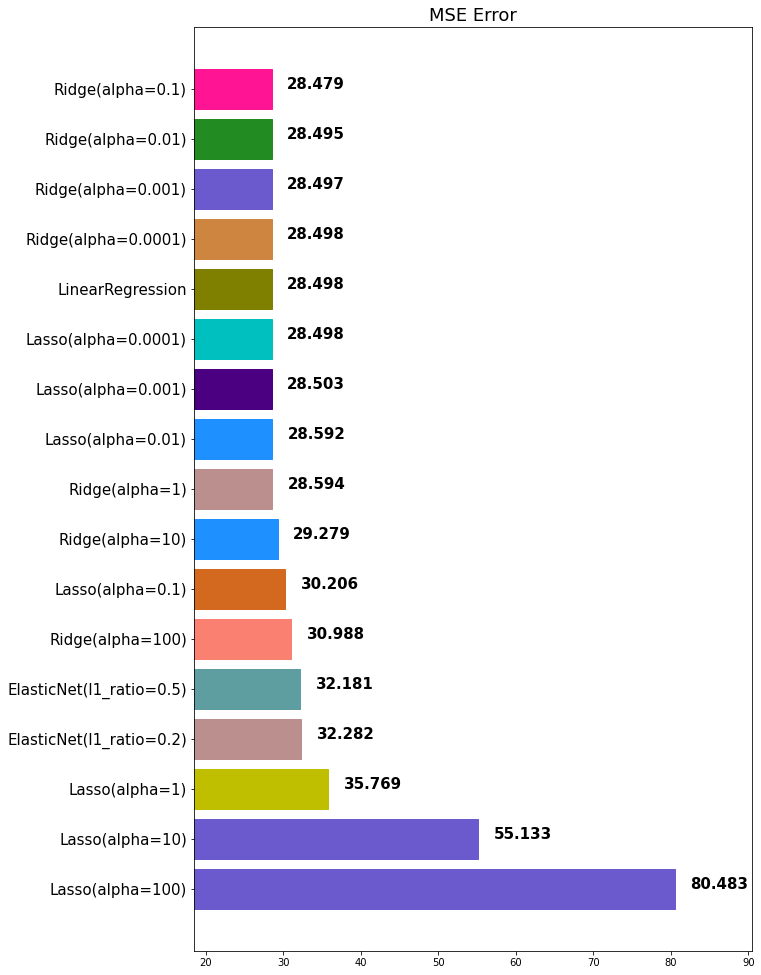

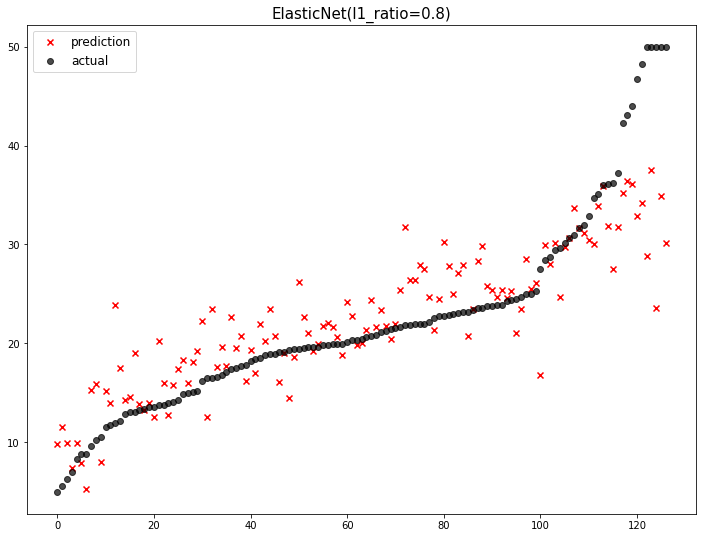

                       model        mse
0           Lasso(alpha=100)  80.482578
1            Lasso(alpha=10)  55.132546
2             Lasso(alpha=1)  35.768550
3   ElasticNet(l1_ratio=0.2)  32.282031
4   ElasticNet(l1_ratio=0.5)  32.180514
5   ElasticNet(l1_ratio=0.8)  31.973698
6           Ridge(alpha=100)  30.987853
7           Lasso(alpha=0.1)  30.206112
8            Ridge(alpha=10)  29.279366
9             Ridge(alpha=1)  28.593862
10         Lasso(alpha=0.01)  28.591530
11        Lasso(alpha=0.001)  28.503423
12       Lasso(alpha=0.0001)  28.498105
13          LinearRegression  28.497553
14       Ridge(alpha=0.0001)  28.497526
15        Ridge(alpha=0.001)  28.497279
16         Ridge(alpha=0.01)  28.494908
17          Ridge(alpha=0.1)  28.479293


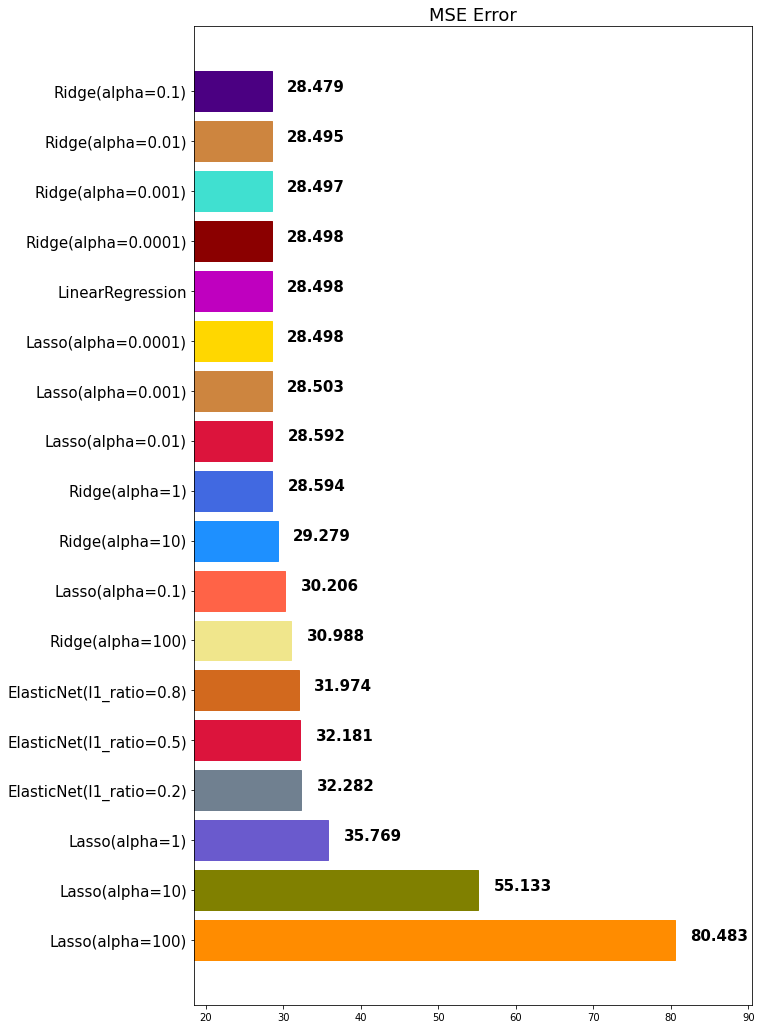

In [56]:
for ratio in ratios:
    elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)

In [57]:
elsticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elsticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elsticnet_20.predict(x_test)

elsticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elsticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elsticnet_80.predict(x_test)

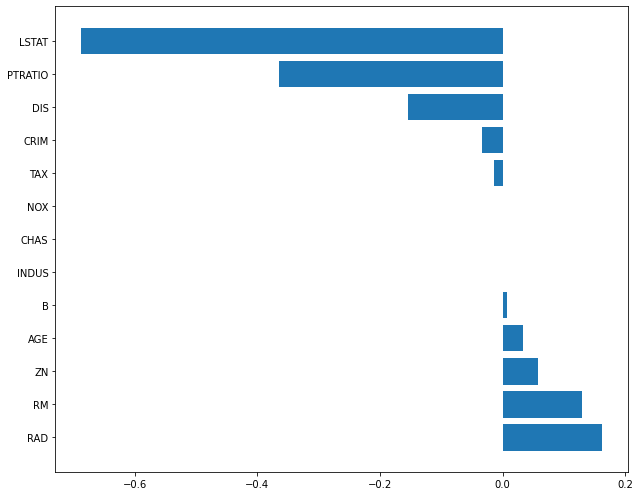

In [58]:
plot_coef(x_train.columns, elsticnet_20.coef_)

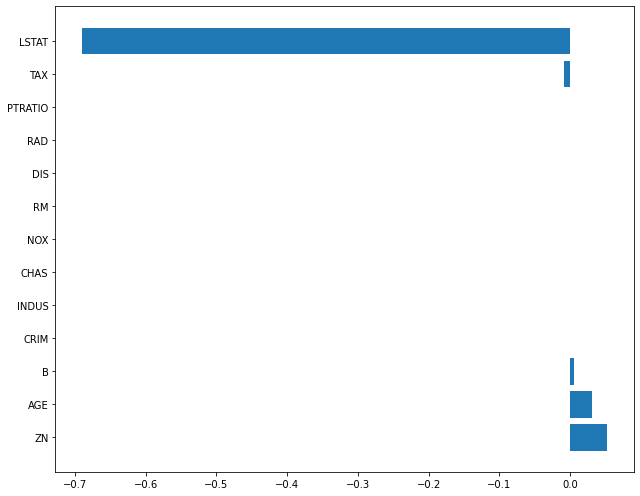

In [59]:
plot_coef(x_train.columns, elsticnet_80.coef_)

In [60]:
elsticnet_80.coef_

array([-0.        ,  0.05236458, -0.        ,  0.        ,  0.        ,
        0.        ,  0.03030051, -0.        ,  0.        , -0.00873153,
       -0.        ,  0.00527084, -0.69019328])

## Scaler

In [61]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [62]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.295732,11.600264,10.986174,0.073879,0.551614,6.285185,67.837203,3.834387,9.182058,402.015831,18.448549,356.252348,12.611451
std,7.691848,23.308047,6.803046,0.261919,0.118156,0.718527,28.215692,2.069264,8.524232,164.473699,2.119503,91.346279,7.328612
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,188.000000,12.600000,0.320000,1.920000
25%,0.082325,0.000000,5.190000,0.000000,0.448000,5.884500,43.550000,2.115300,4.000000,279.000000,17.400000,374.620000,6.755000
50%,0.245220,0.000000,8.560000,0.000000,0.532000,6.212000,76.500000,3.317500,5.000000,330.000000,18.900000,391.450000,11.280000
75%,2.756855,17.750000,18.100000,0.000000,0.624000,6.633000,93.700000,5.118000,8.000000,567.500000,20.200000,396.210000,16.920000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000


### StandardScaler

평균(mean)을 0, 표준편차(std)를 1로 만들어 주는 스케일러

In [63]:
std_scaler = StandardScaler()

In [64]:
std_scaled = std_scaler.fit_transform(x_train)

In [65]:
round(pd.DataFrame(std_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.43,-0.50,-1.55,-0.28,-1.41,-3.80,-2.30,-1.31,-0.96,-1.30,-2.76,-3.90,-1.46
25%,-0.42,-0.50,-0.85,-0.28,-0.88,-0.56,-0.86,-0.83,-0.61,-0.75,-0.50,0.20,-0.80
50%,-0.40,-0.50,-0.36,-0.28,-0.17,-0.10,0.31,-0.25,-0.49,-0.44,0.21,0.39,-0.18
75%,-0.07,0.26,1.05,-0.28,0.61,0.48,0.92,0.62,-0.14,1.01,0.83,0.44,0.59
max,11.15,3.80,2.47,3.54,2.71,3.40,1.14,3.33,1.74,1.88,1.30,0.45,3.46


### MinMaxScaler

min값과 max값을 0~1사이로 정규화

In [66]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

In [67]:
round(pd.DataFrame(minmax_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.04,0.12,0.39,0.07,0.34,0.53,0.67,0.28,0.36,0.41,0.68,0.90,0.30
std,0.09,0.23,0.25,0.26,0.24,0.14,0.29,0.22,0.37,0.31,0.25,0.23,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.17,0.00,0.13,0.45,0.42,0.10,0.13,0.17,0.56,0.94,0.13
50%,0.00,0.00,0.30,0.00,0.30,0.51,0.76,0.23,0.17,0.27,0.73,0.99,0.26
75%,0.03,0.18,0.65,0.00,0.49,0.59,0.94,0.42,0.30,0.73,0.88,1.00,0.42
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### RobustScaler

중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환.

**outlier 값 처리에 유용**

In [68]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [69]:
round(pd.DataFrame(robust_scaled).median(), 2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

### 파이프라인

In [70]:
from sklearn.pipeline import make_pipeline

In [71]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [72]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

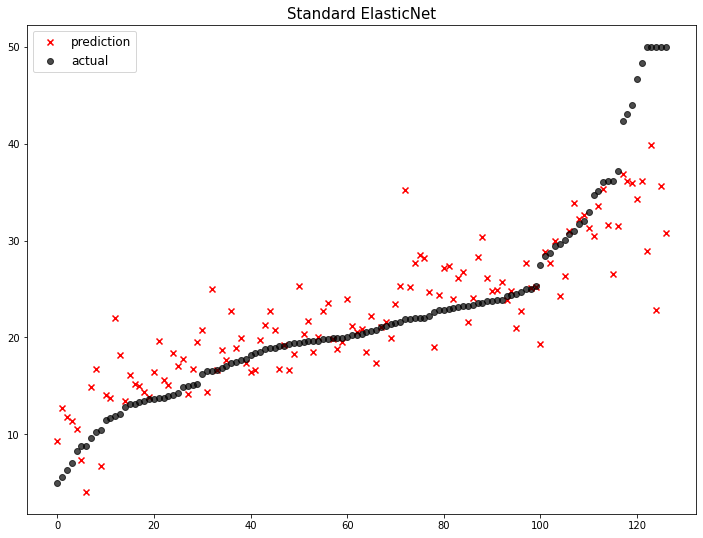

                       model        mse
0           Lasso(alpha=100)  80.482578
1            Lasso(alpha=10)  55.132546
2             Lasso(alpha=1)  35.768550
3   ElasticNet(l1_ratio=0.2)  32.282031
4   ElasticNet(l1_ratio=0.5)  32.180514
5   ElasticNet(l1_ratio=0.8)  31.973698
6           Ridge(alpha=100)  30.987853
7        Standard ElasticNet  30.557089
8           Lasso(alpha=0.1)  30.206112
9            Ridge(alpha=10)  29.279366
10            Ridge(alpha=1)  28.593862
11         Lasso(alpha=0.01)  28.591530
12        Lasso(alpha=0.001)  28.503423
13       Lasso(alpha=0.0001)  28.498105
14          LinearRegression  28.497553
15       Ridge(alpha=0.0001)  28.497526
16        Ridge(alpha=0.001)  28.497279
17         Ridge(alpha=0.01)  28.494908
18          Ridge(alpha=0.1)  28.479293


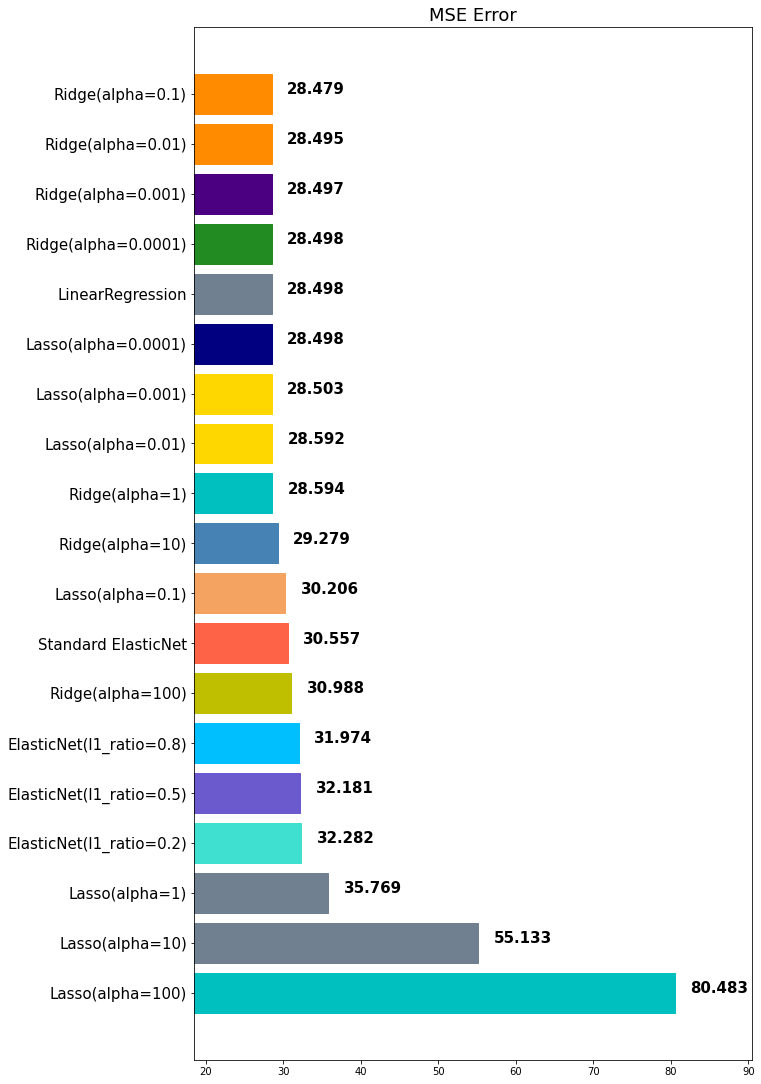

In [73]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

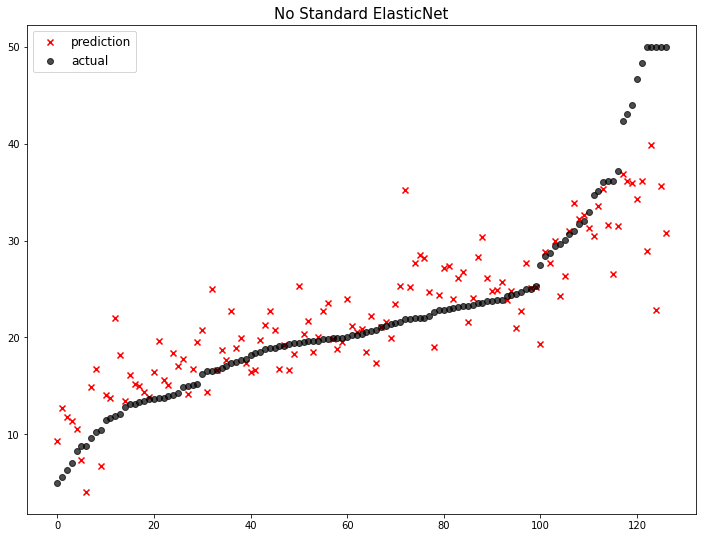

                       model        mse
0           Lasso(alpha=100)  80.482578
1            Lasso(alpha=10)  55.132546
2             Lasso(alpha=1)  35.768550
3   ElasticNet(l1_ratio=0.2)  32.282031
4   ElasticNet(l1_ratio=0.5)  32.180514
5   ElasticNet(l1_ratio=0.8)  31.973698
6           Ridge(alpha=100)  30.987853
7        Standard ElasticNet  30.557089
8     No Standard ElasticNet  30.557089
9           Lasso(alpha=0.1)  30.206112
10           Ridge(alpha=10)  29.279366
11            Ridge(alpha=1)  28.593862
12         Lasso(alpha=0.01)  28.591530
13        Lasso(alpha=0.001)  28.503423
14       Lasso(alpha=0.0001)  28.498105
15          LinearRegression  28.497553
16       Ridge(alpha=0.0001)  28.497526
17        Ridge(alpha=0.001)  28.497279
18         Ridge(alpha=0.01)  28.494908
19          Ridge(alpha=0.1)  28.479293


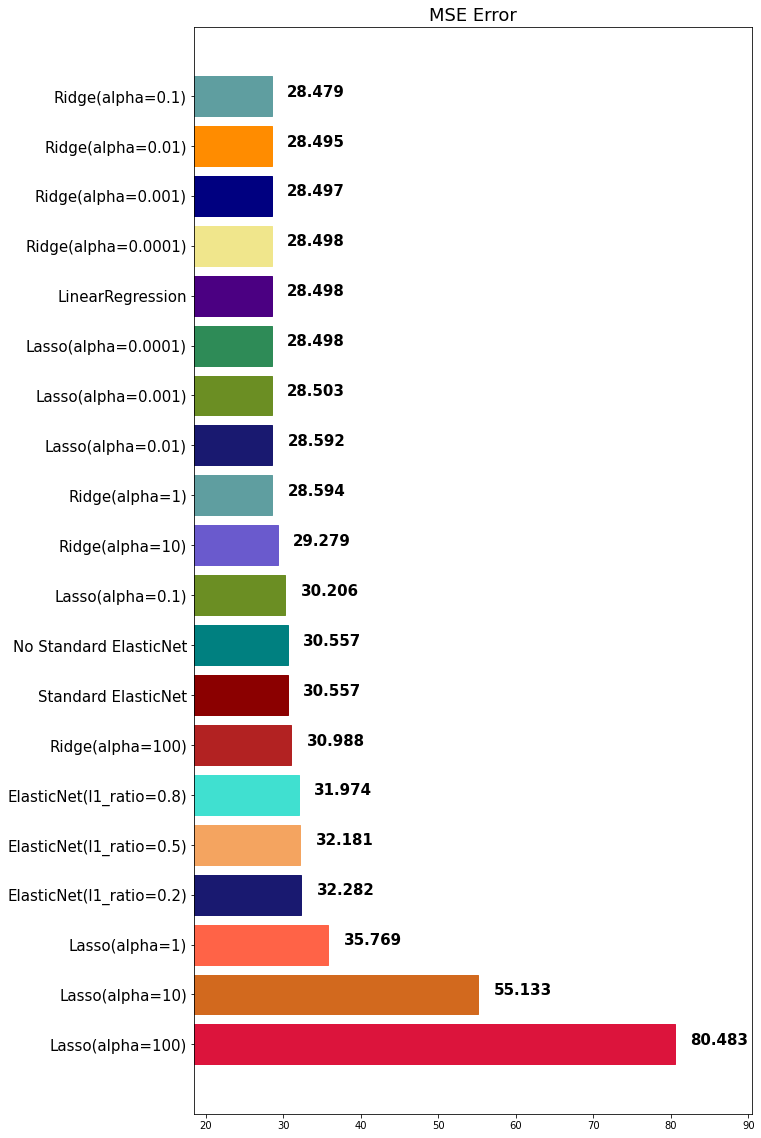

In [74]:
elasticnet_no_pipeline = ElasticNet(alpha=0.1, l1_ratio=0.2)
no_pipeline_pred = elasticnet_no_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('No Standard ElasticNet', elasticnet_pred, y_test)

### 다항 회귀
* 주어진 데이터가 단순한 직선보다 복잡한 형태라면 어떻게 할 것인가? 
* 비선형 데이터를 학습하는데 선형 모델을 사용할 수 있다.
* 이렇게 하는 간단한 방법은 각 특성의 거듭제곱을 새로운 특성으로 추가하고,   
  이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것이다.  
  이런 기법을 다항 회귀(polynominal regression)라고 한다.

**다항 회귀를 활용한 2차 방정식 풀이**

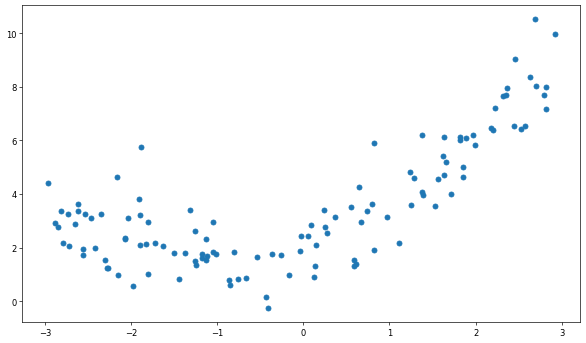

In [75]:
import numpy as np
import matplotlib.pyplot as plt

m = 120
np.random.seed(42)

# -3 ~ 3 범위의 실수값을 생성
# rand함수는 0~1사이의 실수값을 생성한다.
X = 6 * np.random.rand(m,1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1) 
plt.figure(figsize=(12,7), dpi=60)
plt.scatter(X, y)

In [76]:
# 위의 데이터를 PolynominalFeatures를 사용해 훈련 데이터를 변환해보자.
# PolynomialFeatures의 degree 값이 다항의 차수를 정의한다. 
# degree=2이면 2차, 3이면 3차이다.
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [77]:
# X_poly는 제곱의 특성값(Feature)을 추가로 갖는다. 
# X, X**2
X_poly[0]

array([-0.75275929,  0.56664654, -0.42654845])

특성이 여러 개일 때 다항 회귀는 이 특성 사이의 관계를 찾을 수 있다.  
PolynominalFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문이다.
예를 들면, 두 개의 특성 a,b가 있을 때 degree=3으로 PolynominalFeatures를 적용 하면 $$a^2, a^3, b^2, b^3 $$ 뿐만 아니라, $$ab,a^2b,ab^2$$ 도 특성으로 추가한다.

In [78]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.07417096]), array([[0.89094457, 0.49503308, 0.01293085]]))

In [79]:
import os

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

그림 저장: quadratic_predictions_plot


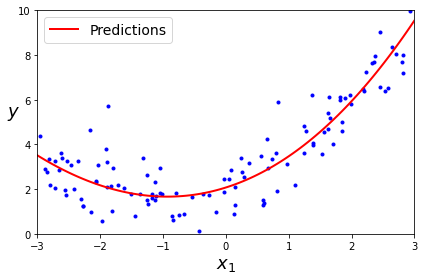

In [80]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

In [81]:
# 고차 다항 회귀를 적용하면 보통의 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추려 할 것이다.
# 300차 다항 회귀 모델과 선형 모델, 그리고 2차 모델과 비교해 보자

위의 그래프를 보면 고차 다항 회귀 모델은 심각하게 훈련 데이터에 과대적합(Overfitting) 되었다.    
반면에 선형 모델은 과소적합(Underfitting)되었다.  위의 그림에서 가장 일반화가  
잘된 모델은 2차 다항 회귀이다. 2차방정식으로 생성한 데이터이기 때문에 당연한   
결과지만 일반적으로 어떤 데이터가 생성됐는지 알 수 없다.   
훈련 데이터에서는 성능이 좋지만 검증 점수가 나쁘다면 모델이 과대적합된 것이고,  
양쪽 모두 좋지 않으면 과소적합이다. 


그림 저장: high_degree_polynomials_plot


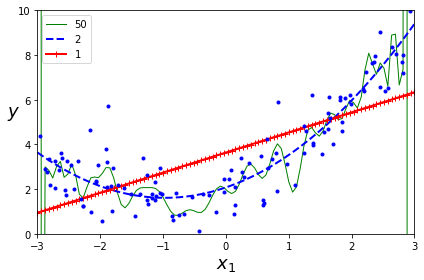

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 50), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

### Polynomial Features

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=poly%20feature#sklearn.preprocessing.PolynomialFeatures)

다항식의 계수간 상호작용을 통해 **새로운 feature를 생성**합니다.

예를들면, [a, b] 2개의 feature가 존재한다고 가정하고,

degree=2로 설정한다면, polynomial features 는 [1, a, b, a^2, ab, b^2] 가 됩니다.

In [83]:
from sklearn.preprocessing import PolynomialFeatures

In [84]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [85]:
poly_features = poly.fit_transform(x_train)[0]

In [86]:
poly_features

array([     5.70818   ,      0.        ,     18.1       ,      0.        ,
            0.532     ,      6.75      ,     74.9       ,      3.3317    ,
           24.        ,    666.        ,     20.2       ,    393.07      ,
            7.74      ,     32.58331891,      0.        ,    103.318058  ,
            0.        ,      3.03675176,     38.530215  ,    427.542682  ,
           19.01794331,    136.99632   ,   3801.64788   ,    115.305236  ,
         2243.7143126 ,     44.1813132 ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,    327.61      ,      0.        ,
            9.6292    ,    122.175     ,   1355.69      ,     60.30377   ,
          434.4       ,  12054.6       ,    365.62      ,   7114.567     ,
          140.094     ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [87]:
x_train.iloc[0]

CRIM         5.70818
ZN           0.00000
INDUS       18.10000
CHAS         0.00000
NOX          0.53200
RM           6.75000
AGE         74.90000
DIS          3.33170
RAD         24.00000
TAX        666.00000
PTRATIO     20.20000
B          393.07000
LSTAT        7.74000
Name: 481, dtype: float64

In [88]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [89]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.724e+01, tolerance: 3.027e+00
  model = cd_fast.enet_coordinate_descent(


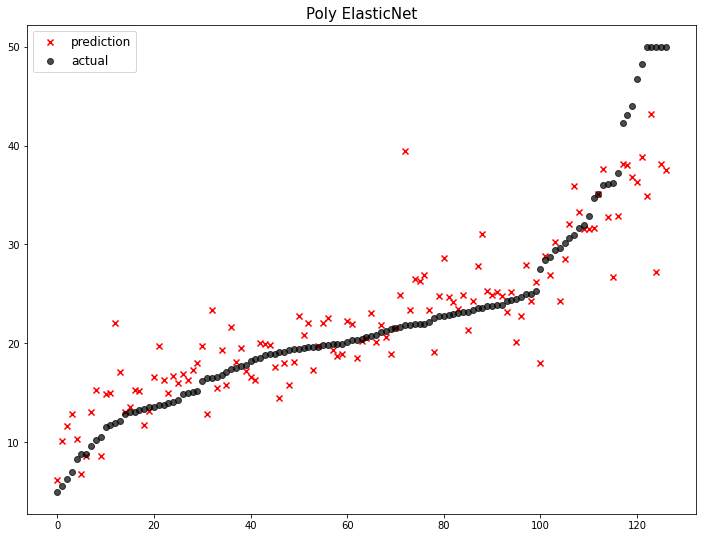

                       model        mse
0           Lasso(alpha=100)  80.482578
1            Lasso(alpha=10)  55.132546
2             Lasso(alpha=1)  35.768550
3   ElasticNet(l1_ratio=0.2)  32.282031
4   ElasticNet(l1_ratio=0.5)  32.180514
5   ElasticNet(l1_ratio=0.8)  31.973698
6           Ridge(alpha=100)  30.987853
7        Standard ElasticNet  30.557089
8     No Standard ElasticNet  30.557089
9           Lasso(alpha=0.1)  30.206112
10           Ridge(alpha=10)  29.279366
11            Ridge(alpha=1)  28.593862
12         Lasso(alpha=0.01)  28.591530
13        Lasso(alpha=0.001)  28.503423
14       Lasso(alpha=0.0001)  28.498105
15          LinearRegression  28.497553
16       Ridge(alpha=0.0001)  28.497526
17        Ridge(alpha=0.001)  28.497279
18         Ridge(alpha=0.01)  28.494908
19          Ridge(alpha=0.1)  28.479293
20           Poly ElasticNet  22.242600


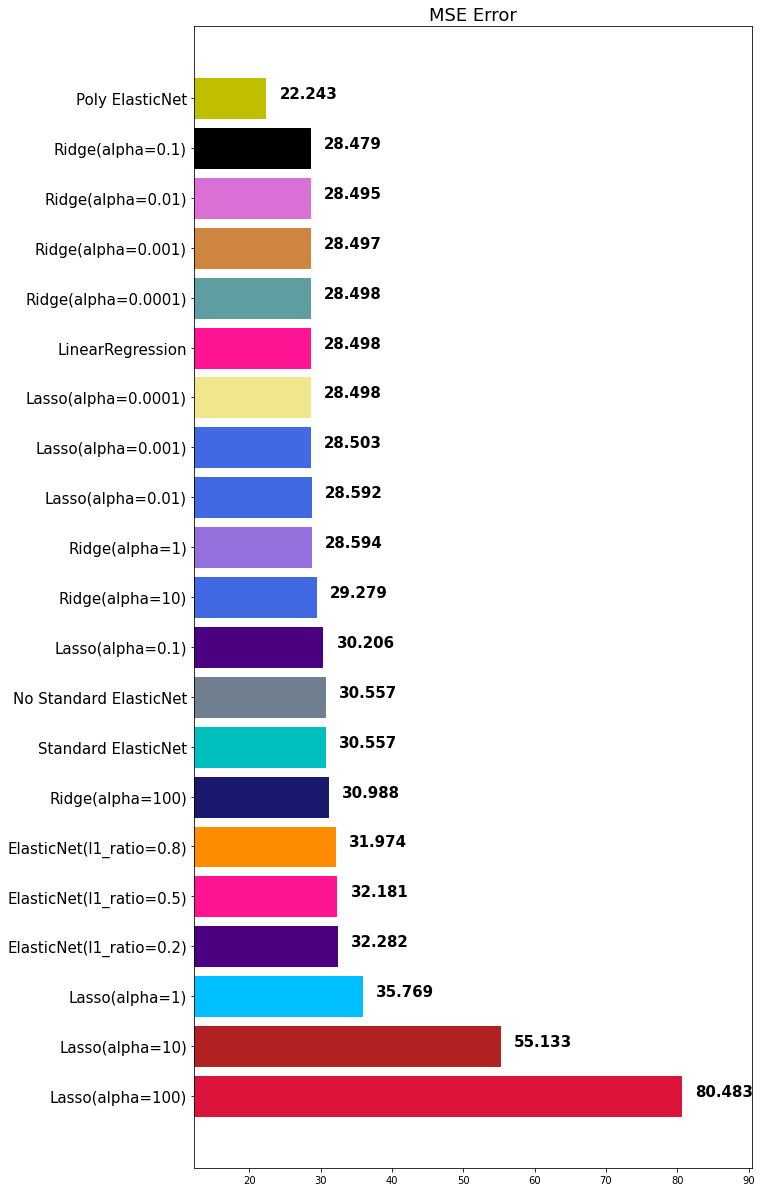

In [90]:
mse_eval('Poly ElasticNet', poly_pred, y_test)